<a href="https://colab.research.google.com/github/psnana-us/week5/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [33]:
data = pd.read_csv('/content/drive/MyDrive/week5/data/coupons.csv')

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [36]:
cleaned_data = data.isna().sum()
print(cleaned_data)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [37]:
cleaned_data = data.dropna()
print(cleaned_data.head())

          destination  passanger weather  temperature  time  \
1237  No Urgent Place      Alone   Sunny           55   2PM   
1238  No Urgent Place  Friend(s)   Sunny           80  10AM   
1239  No Urgent Place  Friend(s)   Sunny           80  10AM   
1240  No Urgent Place  Friend(s)   Sunny           80  10AM   
1241  No Urgent Place  Friend(s)   Sunny           80   2PM   

                     coupon expiration gender age maritalStatus  ...  \
1237        Restaurant(<20)         1d   Male  26        Single  ...   
1238           Coffee House         2h   Male  26        Single  ...   
1239                    Bar         1d   Male  26        Single  ...   
1240  Carry out & Take away         2h   Male  26        Single  ...   
1241           Coffee House         1d   Male  26        Single  ...   

      CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
1237          4~8       4~8                  1~3            never   
1238          4~8       4~8                  1~3  

4. What proportion of the total observations chose to accept the coupon?



In [38]:
# prompt: What proportion of the total observations chose to accept the coupon?

acceptance_rate = cleaned_data['Y'].value_counts(normalize=True)
acceptance_rate

,proportion
Y,
1,0.574074
0,0.425926


5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

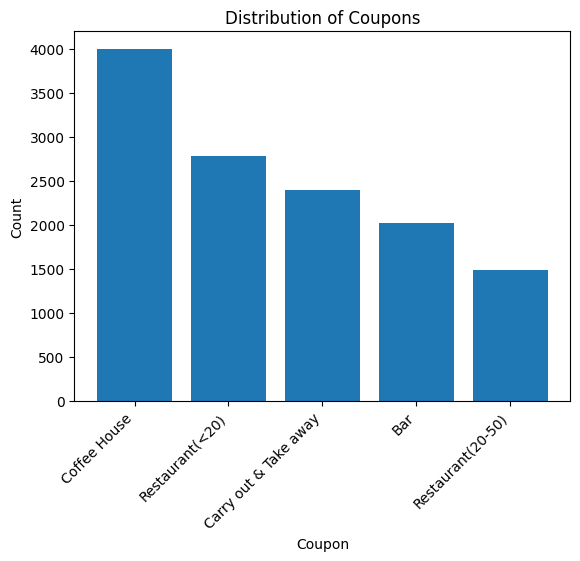

In [39]:
coupon_data = data['coupon'].value_counts()
plt.bar(coupon_data.index, coupon_data.values)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.title('Distribution of Coupons')
plt.xticks(rotation=45, ha='right')

6. Use a histogram to visualize the temperature column.

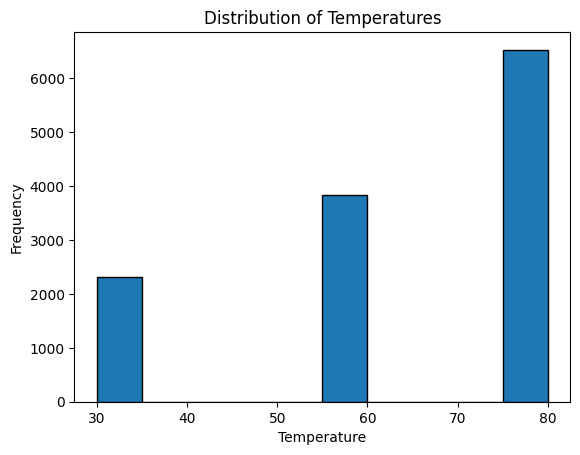

In [40]:
plt.hist(data['temperature'], edgecolor='black')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [42]:
df_bar = data[(data['coupon'] == 'Bar')]

df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [52]:
bar_coupon_acceptance_rate = df_bar['Y'].value_counts(normalize=True)[1]
bar_coupon_acceptance_rate

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [74]:
bar_visits_under_three = data[(data['Bar'].isin(['1~3', 'less1', 'never']))]
bar_visits_under_three_sum = bar_visits_under_three.sum()

bar_visits_over_three = data[(data['Bar'].isin(['4~8', 'gt8']))]
bar_visits_over_three_sum = bar_visits_over_three.sum()

bar_visits_under_three_acceptance = bar_visits_under_three['Y'].value_counts(normalize=True)[1]
bar_visits_over_three_acceptance = bar_visits_over_three['Y'].value_counts(normalize=True)[1]

print(bar_visits_under_three_acceptance)
print(bar_visits_over_three_acceptance)

0.562051649928264
0.6224561403508772


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [80]:
bar_visits_over_once_and_older = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] >= '25')]
bar_visits_all_others = data[~data.index.isin(bar_visits_over_once_and_older.index)]

bar_visits_over_once_and_older_acceptance = bar_visits_over_once_and_older['Y'].value_counts(normalize=True)[1]
bar_visits_all_others_acceptance = bar_visits_all_others['Y'].value_counts(normalize=True)[1]

print(bar_visits_over_once_and_older_acceptance)
print(bar_visits_all_others_acceptance)

0.6213933849401829
0.5531396057711847


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [84]:
bar_visits_not_kid = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['passanger'] != 'Kid(s)')]
bar_visits_other_occupations = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['occupation'] != 'Farming Fishing & Forestry')]

bar_visits_not_kid_acceptance = bar_visits_not_kid['Y'].value_counts(normalize=True)[1]
bar_visits_other_occupations_acceptance = bar_visits_other_occupations['Y'].value_counts(normalize=True)[1]

print(bar_visits_not_kid_acceptance)
print(bar_visits_other_occupations_acceptance)

0.6231060606060606
0.6221139045664443


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [91]:
bar_visits_not_kid_and_not_widowed = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')]
bar_visits_under_30 = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['age'] < '30')]
cheap_restaurants_under_50K = data[(data['Bar'].isin(['4~8', 'gt8'])) & (data['income'] < '$50000')]

bar_visits_not_kid_and_not_widowed_acceptance = bar_visits_not_kid_and_not_widowed['Y'].value_counts(normalize=True)[1]
bar_visits_under_30_acceptance = bar_visits_under_30['Y'].value_counts(normalize=True)[1]
cheap_restaurants_under_50K_acceptance = cheap_restaurants_under_50K['Y'].value_counts(normalize=True)[1]

print(bar_visits_not_kid_and_not_widowed_acceptance)
print(bar_visits_under_30_acceptance)
print(cheap_restaurants_under_50K_acceptance)

0.6231060606060606
0.6284549161758043
0.6282973621103117


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on these observations, we can conclude that patrons who go to the bar 3 or fewer times in a month are likely to accept a coupon 56% of the time compared to those who frequent the bar more than 3 times a month at a coupon acceptance rate of 62%. Those who are over 25 years of age and visit the bar at least once a month are also more likely to accept a coupon compared to their younger counterparts. There is no significant difference between those who frequent the bar more than once a month and do not have a child passenger and those who frequent the bar more than once a month and do not work in farming, fishing, or forestry, both accepting coupons around 62% of the time.

There is also no significant difference in acceptance rates of the coupon between these three demographics of people: go to bars more than once a month, had passengers that were not a kid, and were not widowed, go to bars more than once a month and are under the age of 30, and go to cheap restaurants more than 4 times a month and income is less than 50K. These three groups of people all accepted coupons between 62%-63% of the time.

Those who are accepting bar coupons usually tend to frequent the bar more often, have lower incomes, and are of an older age demographic.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [44]:
coupon_accept = data[(data['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data['passanger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')]

In [92]:
age_acceptance = cleaned_data.groupby('age')['Y'].mean()

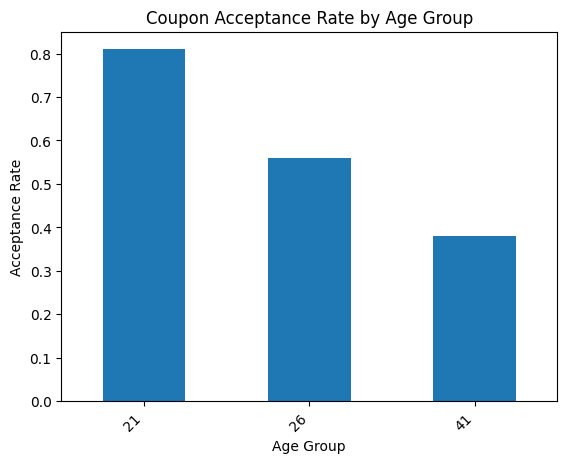

In [93]:
age_acceptance.plot(kind='bar')
plt.title('Coupon Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

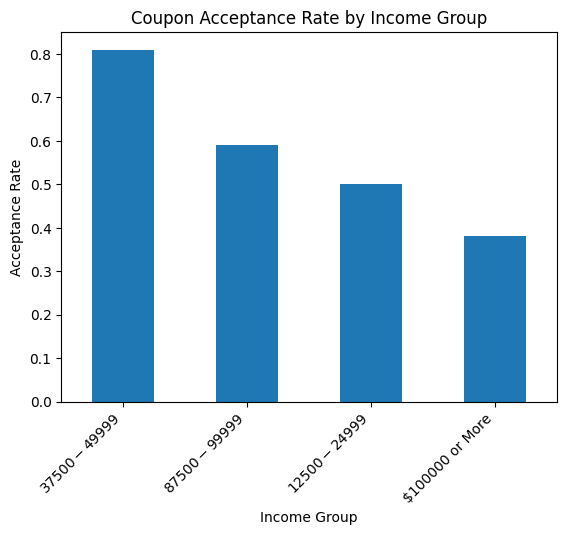

In [95]:
age_acceptance = cleaned_data.groupby('income')['Y'].mean().sort_values(ascending=False)
age_acceptance.plot(kind='bar')
plt.title('Coupon Acceptance Rate by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45, ha='right')
plt.show()